In [22]:
## Importing Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from ipywidgets import FloatProgress
from IPython.display import display

In [2]:
# Read data
data = input_data.read_data_sets("MNIST", one_hot=True)

Extracting MNIST\train-images-idx3-ubyte.gz
Extracting MNIST\train-labels-idx1-ubyte.gz
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz


In [43]:
# Placeholder for noisy image 
img_noisy = tf.placeholder(tf.float32, [None, 784])

# Placeholder for original image
img_original = tf.placeholder(tf.float32, [None, 784])

# Input Layer
input_layer = tf.reshape(img_noisy, [-1, 28, 28, 1])
print("input_layer", input_layer.shape)

# Convolutional layer 1
conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=(5, 5), padding="valid", activation=tf.nn.relu)
print("conv1", conv1.shape)

# Pooling Layer #1
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
print("pool1", pool1.shape)

# Convolutional Layer #2 and Pooling Layer #2
conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=(5, 5), padding="valid", activation=tf.nn.relu)
print("conv2", conv2.shape)

pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
print("pool2", pool2.shape)

# Fully-connected layer 1
conv2_flat = tf.reshape(pool2, [-1, 4 * 4 * 64])
print("conv2_flat", conv2_flat.shape)

dense1 = tf.layers.dense(inputs=conv2_flat, units=4*4*64, activation=tf.nn.relu)
print("dense1", dense1.shape)

dense2 = tf.layers.dense(inputs=dense1, units=100, activation=tf.nn.relu)
print("dense2", dense2.shape)

dense_reshaped = tf.reshape(dense2, [-1, 10, 10, 1])

print("dense_reshaped", dense_reshaped.shape)

conv_trans_1 = tf.layers.conv2d_transpose(dense_reshaped,
                                          filters=64,
                                          kernel_size=(5, 5),
                                          strides=(1, 1),
                                          padding="valid",
                                          activation=tf.nn.relu)

print("conv_trans_1", conv_trans_1.shape)

conv_trans_2 = tf.layers.conv2d_transpose(conv_trans_1,
                                          filters=1,
                                          kernel_size=(15, 15),
                                          strides=(1, 1),
                                          padding="valid",
                                          activation=tf.nn.relu)

print("conv_trans_2", conv_trans_2.shape)

# Calculate loss
loss = tf.reduce_mean(tf.pow(tf.subtract(tf.reshape(conv_trans_2, [-1, 784]), img_original), 2))

input_layer (?, 28, 28, 1)
conv1 (?, 24, 24, 32)
pool1 (?, 12, 12, 32)
conv2 (?, 8, 8, 64)
pool2 (?, 4, 4, 64)
conv2_flat (?, 1024)
dense1 (?, 1024)
dense2 (?, 100)
dense_reshaped (?, 10, 10, 1)
conv_trans_1 (?, 14, 14, 64)
conv_trans_2 (?, 28, 28, 1)


In [44]:
optim = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Make batches to train
num_iter = 1000
batch_size = 64
loss_values = []
progress = FloatProgress(min=0, max=num_iter); display(progress)
for i in range(num_iter):
    progress.description = "Epoch %i/%i" % (i, num_iter)
    
    # Get next batch
    batch_img, _ = data.train.next_batch(batch_size)
    
    # Add noise to the batch
    batch_img_noisy = np.copy(batch_img) + np.random.normal(loc=0.0, scale=0.15, size=batch_img.shape)
    
    # Do training
    _, l, result_test = sess.run([optim, loss, conv_trans_2], feed_dict={ img_noisy: batch_img_noisy, img_original: batch_img })
    loss_values.append(l)
    
    # Show progress
    progress.value += 1

A Jupyter Widget

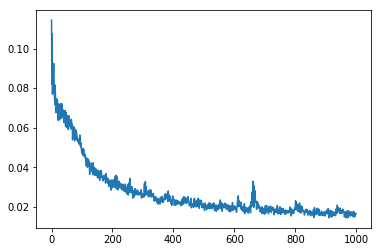

In [45]:
plt.plot(loss_values)
plt.show()

In [46]:
result_test[0].shape

(28, 28, 1)

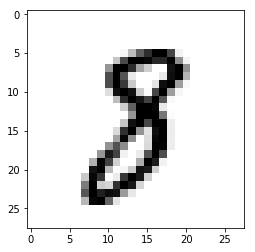

In [47]:
plot_images(batch_img[0])

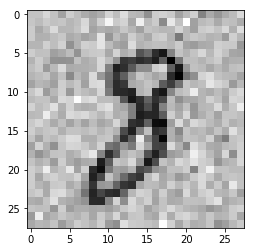

In [48]:
plot_images(batch_img_noisy[0])

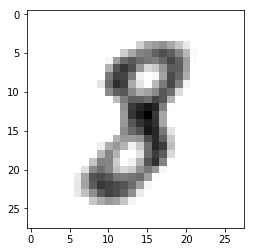

In [49]:
def plot_images(img):
    plt.imshow(img.reshape(28,28), cmap="binary")
plot_images(result_test[0])

In [ ]:
fig, axes = plt.subplots(int(np.ceil(features.size(0) / 2.0)), 2, figsize=(15,25))
for ax in axes.flatten():
    ax.axis("off")
for j, img_id in enumerate(img_ids):
    image = Image.open(os.path.join(data_dir, img_id)).convert('RGB')

    ax = axes[j // 2, j % 2]
    ax.imshow(np.asarray(image))

    for k, reference in enumerate(data_loaders["test"].dataset.reference_captions[img_id]):
        references[k].append(reference)
    caption = vocab.decode_sentence(sampled_captions[j])
    captions.append(caption)
    ax.set_title("%s" % (caption))

    images.append((img_id, caption))

plt.tight_layout()